<a href="https://colab.research.google.com/github/jayoung977/2020Practice/blob/master/spine_mask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pwd

'/content'

In [2]:
cd drive/My Drive/spine/jupyter

/content/drive/My Drive/spine/jupyter


In [3]:
ls

build/      data/       docs/        mritopng/           requirements.txt
circle.yml  dist/       LICENSE      mritopng.egg-info/  setup.py
code/       Dockerfile  MANIFEST.in  README.md           tests/


In [4]:
pip install -r requirements.txt

     |████████████████████████████████| 6.7MB 4.4MB/s 
     |████████████████████████████████| 378kB 31.2MB/s 
     |████████████████████████████████| 163kB 56.4MB/s 
  Created wheel for pydicom: filename=pydicom-1.0.2-cp36-none-any.whl size=6678820 sha256=8ed80ef8551728e42a781e1b168586e503eb2973d88123d07cd79d1173ce8723
  Stored in directory: /root/.cache/pip/wheels/64/c5/a6/dfde9039d7c59b83cc165848da7580ea68c338da02eee98249
  Created wheel for pypng: filename=pypng-0.0.18-cp36-none-any.whl size=31426 sha256=437e87ac2653973484ee949849536ee1dd7d689e6d05e730523db512fda4455f
  Stored in directory: /root/.cache/pip/wheels/ed/30/6c/21dd4d267f47ea09fb57881b30fe16f7231b71bd26dea38afc
Successfully built pydicom pypng


In [5]:
!python setup.py install

running install
running bdist_egg
running egg_info
writing mritopng.egg-info/PKG-INFO
writing dependency_links to mritopng.egg-info/dependency_links.txt
writing entry points to mritopng.egg-info/entry_points.txt
writing requirements to mritopng.egg-info/requires.txt
writing top-level names to mritopng.egg-info/top_level.txt
reading manifest file 'mritopng.egg-info/SOURCES.txt'
reading manifest template 'MANIFEST.in'
writing manifest file 'mritopng.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/mritopng
copying build/lib/mritopng/models.py -> build/bdist.linux-x86_64/egg/mritopng
copying build/lib/mritopng/__init__.py -> build/bdist.linux-x86_64/egg/mritopng
copying build/lib/mritopng/contrast.py -> build/bdist.linux-x86_64/egg/mritopng
copying build/lib/mritopng/__main__.py -> build/bdist.linux-x86_64/egg/mritopng
byte-compiling build/bdist.lin

In [6]:
pip install SimpleITK

     |████████████████████████████████| 42.5MB 67kB/s 


#상헌쌤이 도와주신 부분

In [7]:
import os
import SimpleITK as sitk
import numpy as np
import csv
import glob


def load_itk_image(filename):
    itkimage = sitk.ReadImage(filename)
    numpyImage = sitk.GetArrayFromImage(itkimage)

    numpyOrigin = np.array(list(reversed(itkimage.GetOrigin())))
    numpySpacing = np.array(list(reversed(itkimage.GetSpacing())))

    return numpyImage, numpyOrigin, numpySpacing

 

(1, 2500, 2048)


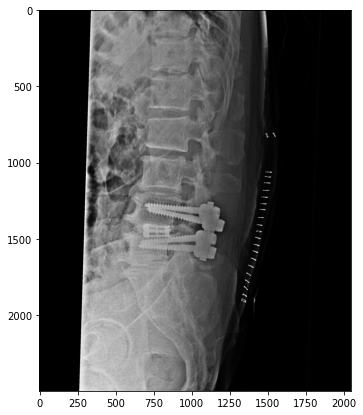

In [8]:
import SimpleITK as sitk

img = sitk.ReadImage('/content/drive/My Drive/spine/jupyter/data/dcm/I0000000002.dcm')
#print(img)

image = sitk.GetArrayFromImage(img)
print(image.shape)

import matplotlib.pyplot as plt

plt.figure(figsize=(7,7))
plt.imshow(image[0], cmap='gray')
plt.show()

In [9]:
import os, glob

roi_list = glob.glob('/content/drive/My Drive/spine/jupyter/data/roi/I0000000002/*.roi')

for i in range(len(roi_list)):
  print(roi_list[i])

/content/drive/My Drive/spine/jupyter/data/roi/I0000000002/0087-0894.roi
/content/drive/My Drive/spine/jupyter/data/roi/I0000000002/1584-0736.roi
/content/drive/My Drive/spine/jupyter/data/roi/I0000000002/1075-0798.roi
/content/drive/My Drive/spine/jupyter/data/roi/I0000000002/0816-0847.roi
/content/drive/My Drive/spine/jupyter/data/roi/I0000000002/1326-0765.roi
/content/drive/My Drive/spine/jupyter/data/roi/I0000000002/0300-0871.roi
/content/drive/My Drive/spine/jupyter/data/roi/I0000000002/0553-0865.roi


In [10]:
pip install read_roi

  Created wheel for read-roi: filename=read_roi-1.6.0-py2.py3-none-any.whl size=8029 sha256=558368d0df53379642653c26a63fc3fde5877b29361d7191b16be15c8ac53176
  Stored in directory: /root/.cache/pip/wheels/9b/65/9c/11e19146187721d543eb606499e0a7abe52e48ecb73efaedbb
Successfully built read-roi


In [11]:
import read_roi
from read_roi import read_roi_file

roi = read_roi_file('/content/drive/My Drive/spine/jupyter/data/roi/I0000000002/0087-0894.roi')
print(roi)
  

{'0087-0894': {'type': 'polygon', 'x': [738, 840, 939, 978, 984, 1011, 1050, 963, 918, 825, 756, 759], 'y': [150, 138, 144, 171, 120, 66, 18, 18, 24, 6, 3, 51], 'n': 12, 'width': 0, 'name': '0087-0894', 'position': 0}}


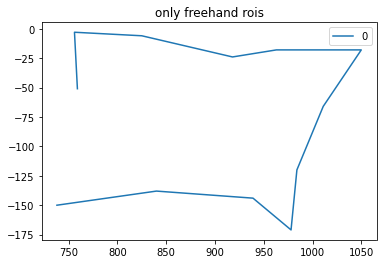

In [12]:
from skimage import draw


a = roi
for i,k in enumerate(list(a.keys())):
  if a[k]['type']=='polygon' :
    
    plt.plot(np.array(a[k]['x']),-(np.array(a[k]['y'])),label=str(i))
    plt.title('only freehand rois')
plt.legend()
plt.show()

pad = np.zeros([512,512])

#내가 한부분
- png로 바꾸는 방법은 해보긴했으나 생략함
1. polygon 그리는 방법 (방법1:성공, 방법2:실패)
2. mask로 만드는 방법  (방법1-cv2사용:실패, 방법2:실패)

In [13]:
# x좌표 
np.array(a[k]['x'])

array([ 738,  840,  939,  978,  984, 1011, 1050,  963,  918,  825,  756,
        759])

In [14]:
# x좌표를 열형태로 바꾸기
x = np.array(a[k]['x'])
x.shape
x = x.reshape(12,1)

In [15]:
# y좌표
y = np.array(a[k]['y'])
y.shape
y = y.reshape(12,1)

In [16]:
#[x,y]꼴로 바꾸기
sumxy = np.hstack((x,y))
sumxy

array([[ 738,  150],
       [ 840,  138],
       [ 939,  144],
       [ 978,  171],
       [ 984,  120],
       [1011,   66],
       [1050,   18],
       [ 963,   18],
       [ 918,   24],
       [ 825,    6],
       [ 756,    3],
       [ 759,   51]])

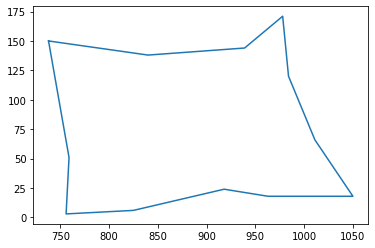

In [17]:
#다각형그리기 방법1
import matplotlib.pyplot as plt

coord = [[ 738,  150],
       [ 840,  138],
       [ 939,  144],
       [ 978,  171],
       [ 984,  120],
       [1011,   66],
       [1050,   18],
       [ 963,   18],
       [ 918,   24],
       [ 825,    6],
       [ 756,    3],
       [ 759,   51]]
coord.append(coord[0]) #repeat the first point to create a 'closed loop'

xs, ys = zip(*coord) #create lists of x and y values
plt.figure()
plt.plot(xs,ys) 
plt.show()

In [18]:
# 다각형을 그리는 또 다른 방법2 ..왜 안되지...

import PIL.ImageDraw as ImageDraw
import PIL.Image as Image

image = Image.new("RGB", (640, 480))

draw = ImageDraw.Draw(image)

# points = ((1,1), (2,1), (2,2), (1,2), (0.5,1.5))
points = ((738,  150),
       ( 840,  138),
       ( 939,  144),
       ( 978,  171),
       ( 984,  120),
       (1011,   66),
       (1050,   18),
       ( 963,   18),
       ( 918,   24),
       ( 825,    6),
       ( 756,    3),
       ( 759,   51))
draw.polygon((points), fill=200)

image.show()


##-mask

In [19]:
#방법1
import cv2
import numpy as np
white_color =(255,255,255)
point = np.array([[ 738,  150],
       [ 840,  138],
       [ 939,  144],
       [ 978,  171],
       [ 984,  120],
       [1011,   66],
       [1050,   18],
       [ 963,   18],
       [ 918,   24],
       [ 825,    6],
       [ 756,    3],
       [ 759,   51]], np.int32)
img = np.zeros((2048,2500,3),np.uint8)
img = cv2.fillPoly(img,[point],white_color)
cv2.imshow('polygon',img)
        
# mskp= "C:/Users/user/Untitled Folder/mask/"
# mskn= "%s.png" %rfolname[fl]
# cv2.imwrite(mskp+mskn, img1) 

plt.figure(figsize=(20,20))
plt.imshow(img)

DisabledFunctionError: ignored

In [20]:
#방법2
def poly2mask(vertex_row_coords, vertex_col_coords, shape):
  fill_row_coords, fill_col_coords = draw.polygon(vertex_row_coords, vertex_col_coords, shape)
  mask = np.zeros(shape, dtype=np.bool)
  mask[fill_row_coords, fill_col_coords] = True
  return mask


for i,k in enumerate(list(a.keys())):
  if a[k]['type']=='polygon' :
    x_j = np.array(a[k]['x'])
    y_j = np.array(a[k]['y'])
   
mask = poly2mask(y_j, x_j, (512,512))
plt.imshow(mask, cmap='gray')
plt.show()


TypeError: ignored

In [21]:
import SimpleITK as sitk
import read_roi
from read_roi import read_roi_file
from skimage import draw
import matplotlib.pyplot as plt

def poly2mask(vertex_row_coords, vertex_col_coords, shape):
  fill_row_coords, fill_col_coords = draw.polygon(vertex_row_coords, vertex_col_coords, shape)
  mask = np.zeros(shape, dtype=np.bool)
  mask[fill_row_coords, fill_col_coords] = True
  return mask

(1, 2500, 2048)


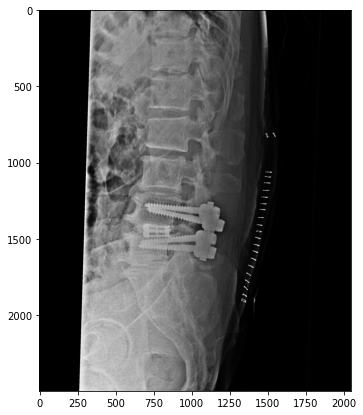

In [22]:
img = sitk.ReadImage('/content/drive/My Drive/spine/jupyter/data/dcm/I0000000002.dcm')
#print(img)

image = sitk.GetArrayFromImage(img)
print(image.shape)



plt.figure(figsize=(7,7))
plt.imshow(image[0], cmap='gray')
plt.show()

In [24]:
roi = read_roi_file('/content/drive/My Drive/spine/jupyter/data/roi/I0000000002/0087-0894.roi')
print(roi)

{'0087-0894': {'type': 'polygon', 'x': [738, 840, 939, 978, 984, 1011, 1050, 963, 918, 825, 756, 759], 'y': [150, 138, 144, 171, 120, 66, 18, 18, 24, 6, 3, 51], 'n': 12, 'width': 0, 'name': '0087-0894', 'position': 0}}


In [33]:
roi_list = glob.glob('/content/drive/My Drive/spine/jupyter/data/roi/I0000000002/*.roi')
for i in roi_list:
  roi[i] = read_roi_file(i)
  print(roi[i])

{'0087-0894': {'type': 'polygon', 'x': [738, 840, 939, 978, 984, 1011, 1050, 963, 918, 825, 756, 759], 'y': [150, 138, 144, 171, 120, 66, 18, 18, 24, 6, 3, 51], 'n': 12, 'width': 0, 'name': '0087-0894', 'position': 0}}
{'1584-0736': {'type': 'polygon', 'x': [609, 705, 858, 879, 852, 831, 855, 849, 768, 570, 606], 'y': [1473, 1497, 1482, 1488, 1527, 1590, 1650, 1686, 1662, 1644, 1551], 'n': 11, 'width': 0, 'name': '1584-0736', 'position': 0}}
{'1075-0798': {'type': 'polygon', 'x': [666, 789, 900, 942, 915, 915, 906, 795, 684, 654, 684, 687], 'y': [981, 975, 990, 990, 1074, 1164, 1176, 1155, 1170, 1155, 1083, 1035], 'n': 12, 'width': 0, 'name': '1075-0798', 'position': 0}}
{'0816-0847': {'type': 'polygon', 'x': [717, 768, 852, 963, 981, 993, 963, 954, 978, 978, 957, 894, 729, 702, 720], 'y': [723, 714, 714, 708, 699, 717, 756, 840, 894, 924, 933, 909, 900, 885, 822], 'n': 15, 'width': 0, 'name': '0816-0847', 'position': 0}}
{'1326-0765': {'type': 'polygon', 'x': [633, 777, 915, 897, 879,

In [25]:
image[0].shape

(2500, 2048)

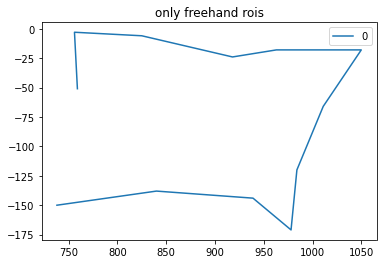

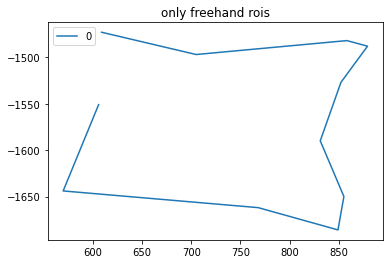

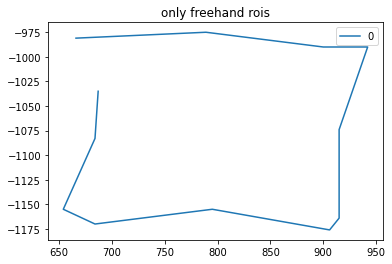

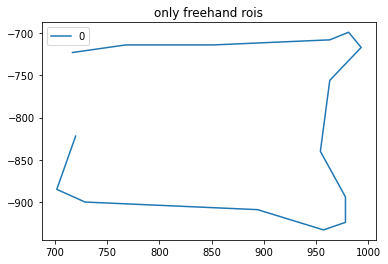

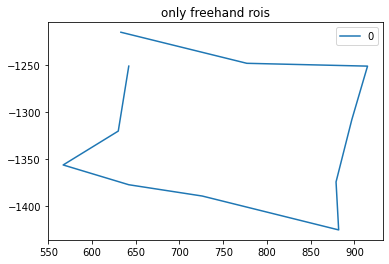

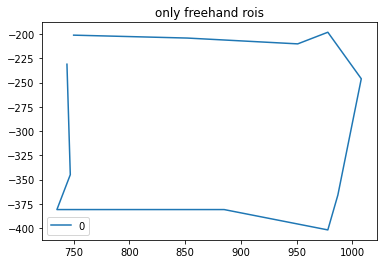

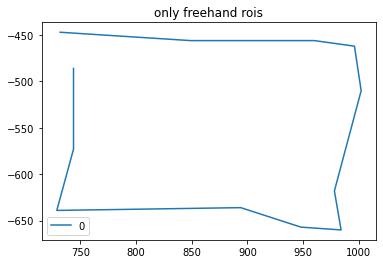

In [36]:
for i in roi_list:
  roi[i] = read_roi_file(i)
  a = roi[i]
  for j,k in enumerate(list(a.keys())):
   if a[k]['type']=='polygon' :
    
     plt.plot(np.array(a[k]['x']),-(np.array(a[k]['y'])),label=str(j))
     plt.title('only freehand rois')
     plt.legend()
     plt.show()

pad = np.zeros(image[0].shape)

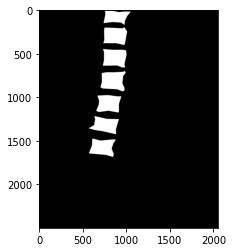

In [41]:
for i in roi_list:
  roi[i] = read_roi_file(i)
  a = roi[i]
  for j,k in enumerate(list(a.keys())):
   if a[k]['type']=='polygon' :
     x_j = np.array(a[k]['x'])
     y_j = np.array(a[k]['y'])
   
     mask = poly2mask(y_j, x_j, image[0].shape) + mask
plt.imshow(mask, cmap='gray')
plt.show()


In [28]:
mask.shape == image[0].shape

True

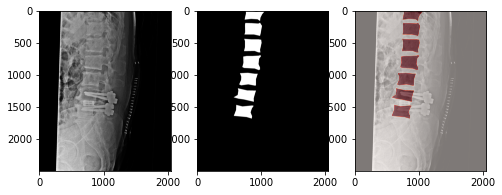

In [42]:
plt.figure(figsize=(8,8))
plt.subplot(1,3,1)
plt.imshow(image[0], cmap='gray')
plt.subplot(1,3,2)
plt.imshow(mask, cmap='gray')
plt.subplot(1,3,3)
plt.imshow(image[0], cmap='gray')
plt.imshow(mask, cmap='Reds', alpha=0.5)
plt.show()

In [30]:
# 다 나오게, 영상
# 혹여 겹치는게 있으면 if문을 써서 125 보다 크면 나오게(맞나?)
